<a href="https://colab.research.google.com/github/cimisachimi/IOT-smartagriculture-service-api/blob/main/Big_Data_UAS_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muhammad Faturahman 22.11.5183

https://colab.research.google.com/drive/1_nPdyE9ZSh8k2HSyGOU1xuTv_anRLAeF?usp=sharing

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Install necessary libraries
# Install necessary libraries
!pip install scikit-learn
!pip install catboost
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Load Dataset (Ganti path dengan lokasi dataset Anda)
file_path = '/content/drive/MyDrive/Dataset/employee_attrition_dataset.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  1) Analisis Fitur

In [4]:
# 1. Penjelasan Setiap Kolom (contoh)
print("Deskripsi Kolom:")
print(data.info())


Deskripsi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-nul

Hasil Analisis
Fitur tersebut banyak yang mengandung data berbentuk objek dengan value seperti (yes dan no) dan ( None, Low, Medium, High)

In [5]:
# 1. Tampilkan 5 baris pertama dataset
print("5 Baris Pertama Dataset:")
print(data.head())


5 Baris Pertama Dataset:
   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1   58    Male         Single    Finance    Manager          5   
1            2   48  Female       Divorced         HR  Assistant          4   
2            3   34  Female        Married  Marketing    Manager          4   
3            4   27  Female       Divorced         HR    Manager          4   
4            5   40    Male        Married         HR    Analyst          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0            7332           81                24  ...        No   
1            6069           55                18  ...       Yes   
2           11485           65                 6  ...       Yes   
3           18707           28                12  ...        No   
4           16398           92                 3  ...        No   

   Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
0              9                 

## Key Features (Fitur Utama):

1. **Employee_ID**: Identifikasi unik untuk setiap karyawan.
2. **Age**: Usia karyawan.
3. **Gender**: Jenis kelamin karyawan.
4. **Marital_Status**: Status pernikahan karyawan (Single, Married, Divorced).
5. **Department**: Departemen tempat karyawan bekerja (misalnya, HR, IT, Sales, Marketing).
6. **Job_Role**: Peran spesifik dalam departemen (misalnya, Manager, Analyst).
7. **Job_Level**: Tingkat dalam hierarki organisasi.
8. **Monthly_Income**: Gaji bulanan karyawan.
9. **Hourly_Rate**: Tarif per jam untuk karyawan yang bekerja berdasarkan jam.
10. **Years_at_Company**: Jumlah tahun karyawan telah bekerja di perusahaan.
11. **Years_in_Current_Role**: Jumlah tahun karyawan telah bekerja dalam peran mereka saat ini.
12. **Years_Since_Last_Promotion**: Waktu yang telah berlalu sejak promosi terakhir karyawan.
13. **Work_Life_Balance**: Penilaian keseimbangan kerja dan kehidupan.
14. **Job_Satisfaction**: Penilaian kepuasan kerja (skala 1-5).
15. **Performance_Rating**: Penilaian kinerja (skala 1-5).
16. **Training_Hours_Last_Year**: Jumlah jam pelatihan yang diselesaikan tahun lalu.
17. **Overtime**: Apakah karyawan bekerja lembur (Yes/No).
18. **Project_Count**: Jumlah proyek yang dikelola oleh karyawan.
19. **Average_Hours_Worked_Per_Week**: Rata-rata jam kerja per minggu.
20. **Absenteeism**: Jumlah hari ketidakhadiran karyawan dalam setahun.
21. **Work_Environment_Satisfaction**: Penilaian kepuasan terhadap lingkungan kerja.
22. **Relationship_with_Manager**: Penilaian hubungan dengan manajer.
23. **Job_Involvement**: Penilaian keterlibatan dalam pekerjaan.
24. **Distance_From_Home**: Jarak dari rumah ke tempat kerja (dalam kilometer).
25. **Number_of_Companies_Worked**: Jumlah perusahaan yang telah pernah dijalani oleh karyawan.
26. **Attrition**: Kolom target (Yes/No) yang menunjukkan apakah karyawan meninggalkan perusahaan.


In [6]:
print(data.describe(""))

       Employee_ID           Age     Job_Level  Monthly_Income   Hourly_Rate  \
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    5000.50000     39.561800      2.990800    11436.716700     57.032300   
std     2886.89568     11.454986      1.410643     4926.528302     24.703261   
min        1.00000     20.000000      1.000000     3000.000000     15.000000   
50%     5000.50000     40.000000      3.000000    11401.500000     57.000000   
max    10000.00000     59.000000      5.000000    19999.000000     99.000000   

       Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  \
count      10000.000000           10000.000000                10000.000000   
mean          14.936200               7.451300                    4.471900   
std            8.431657               4.042903                    2.891617   
min            1.000000               1.000000                    0.000000   
50%           15.000000               7.000000   

In [7]:
# 3. Cek Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64



Distribusi Variabel Numerik:


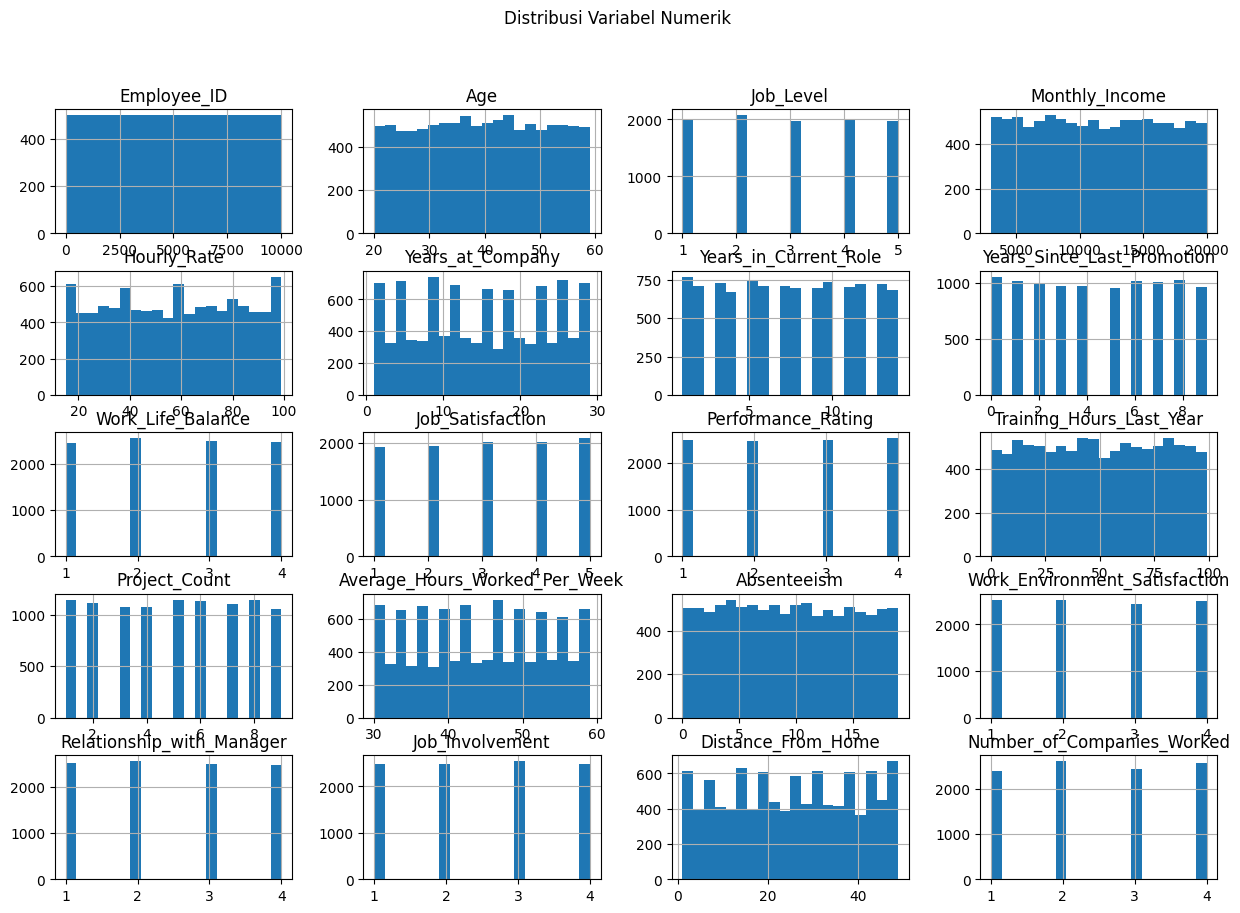

In [8]:
# 4. Distribusi Data
# Distribusi variabel numerik
print("\nDistribusi Variabel Numerik:")
data.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Variabel Numerik")
plt.show()




Distribusi Variabel Kategorikal:

Distribusi untuk Gender:
Gender
Female    5042
Male      4958
Name: count, dtype: int64


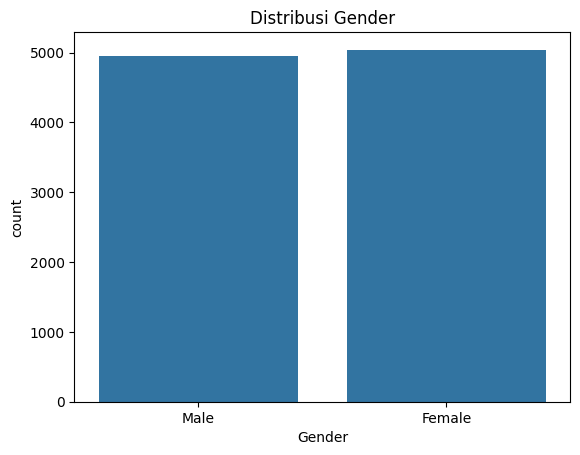


Distribusi untuk Marital_Status:
Marital_Status
Married     3375
Divorced    3330
Single      3295
Name: count, dtype: int64


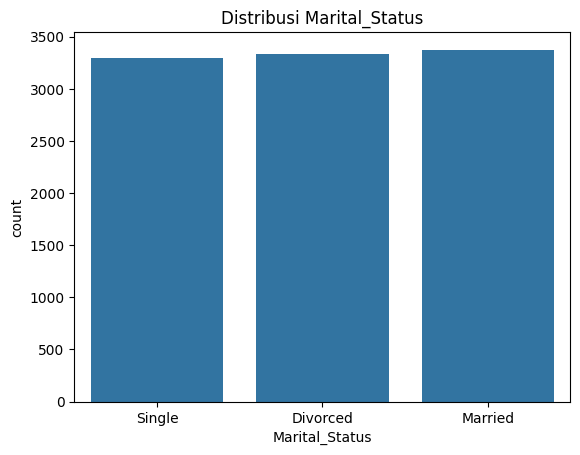


Distribusi untuk Department:
Department
Marketing    2133
Sales        2008
Finance      1990
HR           1953
IT           1916
Name: count, dtype: int64


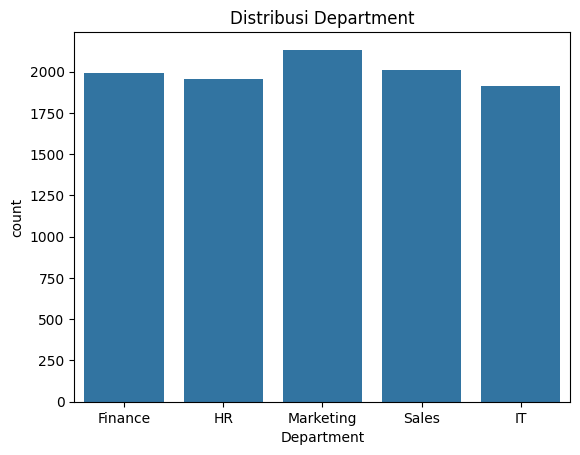


Distribusi untuk Job_Role:
Job_Role
Analyst      2572
Assistant    2538
Executive    2476
Manager      2414
Name: count, dtype: int64


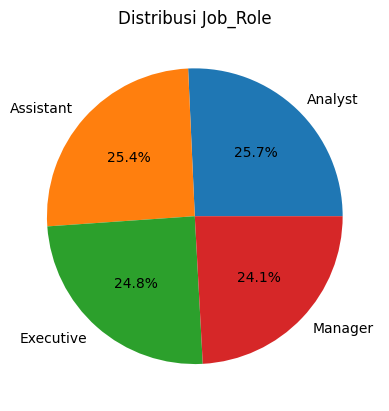


Distribusi untuk Overtime:
Overtime
No     5103
Yes    4897
Name: count, dtype: int64


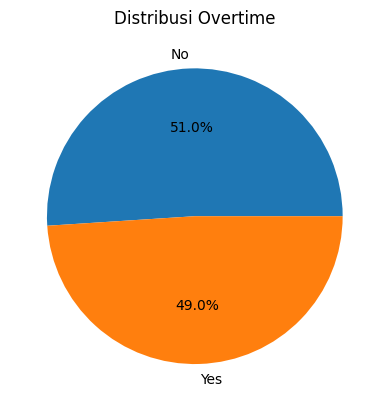


Distribusi untuk Attrition:
Attrition
No     8003
Yes    1997
Name: count, dtype: int64


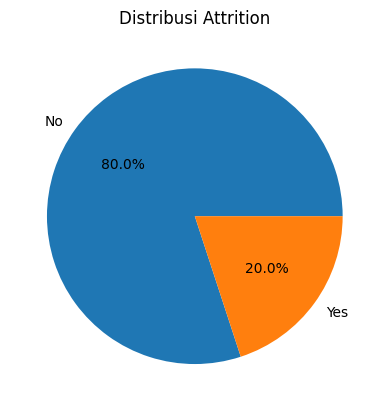

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi variabel kategorikal
print("\nDistribusi Variabel Kategorikal:")
categorical_columns = data.select_dtypes(include=['object']).columns

# Determine the split point
split_point = len(categorical_columns) // 2

# First half as bar plots
for col in categorical_columns[:split_point]:
    print(f"\nDistribusi untuk {col}:")
    print(data[col].value_counts())
    sns.countplot(data=data, x=col)
    plt.title(f"Distribusi {col}")
    plt.show()

# Second half as pie charts
for col in categorical_columns[split_point:]:
    print(f"\nDistribusi untuk {col}:")
    print(data[col].value_counts())
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"Distribusi {col}")
    plt.ylabel('')  # Remove the y-label for pie charts
    plt.show()


Distribusi Variabel Target (Attrition):
Attrition
No     8003
Yes    1997
Name: count, dtype: int64


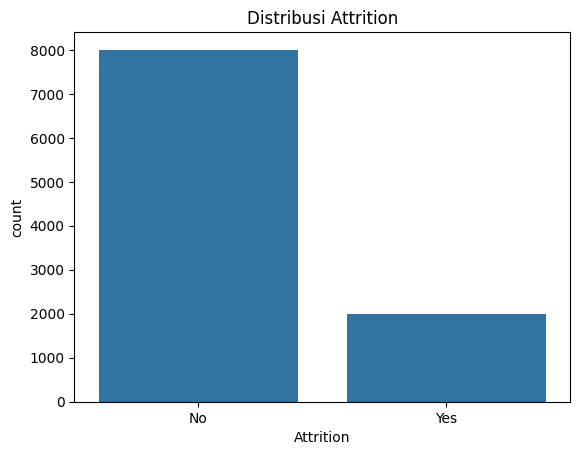

In [10]:
# 7. Analisis Variabel Target (Attrition)
print("\nDistribusi Variabel Target (Attrition):")
print(data['Attrition'].value_counts())
sns.countplot(data=data, x='Attrition')
plt.title("Distribusi Attrition")
plt.show()

# 2) Pre Processing Data

In [11]:
# Check for missing values (null) in the dataframe
print(data.isnull().sum())


Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


Melakukan pengecekan nilai null pada taip fiturnya setelah dianalisis terdapat seitar 20-30 dari 10000 data pada tiap fiturnya yang berisi null dan juga ada 2586 dari 10000 data null pada Alcohol Consumption

Solusi yang saya pilih adalah menghapus baris data pada fitur yang memiliki 20-30 karena datanya tidak mencapai 2% dari keseluruhan data dan untuk data null sebanyak 2586 data pada fitur alcohol consumption saya lakukan penggantian nilai dengan mengganti None/null dengan 0

Semua fitur sudah terbebas dari nilai null

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [13]:
import pandas as pd

# Assuming df is a pandas DataFrame
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", categorical_columns)



Numerical Columns:
 ['Employee_ID', 'Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']

Categorical Columns:
 ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime', 'Attrition']


In [14]:
# Display unique values for each categorical column
for col_name in categorical_columns:
    print(f"\nColumn: {col_name}")
    unique_values_list = data[col_name].unique().tolist()
    print(f"Unique Values: {unique_values_list}")



Column: Gender
Unique Values: ['Male', 'Female']

Column: Marital_Status
Unique Values: ['Single', 'Divorced', 'Married']

Column: Department
Unique Values: ['Finance', 'HR', 'Marketing', 'Sales', 'IT']

Column: Job_Role
Unique Values: ['Manager', 'Assistant', 'Analyst', 'Executive']

Column: Overtime
Unique Values: ['No', 'Yes']

Column: Attrition
Unique Values: ['No', 'Yes']


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called df
# One-Hot Encoding for categorical columns
data = pd.get_dummies(data, columns=['Gender', 'Marital_Status', 'Department', 'Job_Role'], drop_first=True)

# Label Encoding for 'Overtime' and 'Attrition'
label_encoder = LabelEncoder()
data['Overtime'] = label_encoder.fit_transform(data['Overtime'])
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


In [16]:
# Loop through each column and convert boolean columns to 1/0
data = data.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Check the result
print(data.head())


   Employee_ID  Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
0            1   58          5            7332           81                24   
1            2   48          4            6069           55                18   
2            3   34          4           11485           65                 6   
3            4   27          4           18707           28                12   
4            5   40          1           16398           92                 3   

   Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  \
0                     12                           3                  1   
1                      7                           5                  1   
2                      4                           3                  4   
3                      9                           1                  1   
4                      9                           1                  3   

   Job_Satisfaction  ...  Gender_Male  Marital_Status_Married 

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Employee_ID                    10000 non-null  int64
 1   Age                            10000 non-null  int64
 2   Job_Level                      10000 non-null  int64
 3   Monthly_Income                 10000 non-null  int64
 4   Hourly_Rate                    10000 non-null  int64
 5   Years_at_Company               10000 non-null  int64
 6   Years_in_Current_Role          10000 non-null  int64
 7   Years_Since_Last_Promotion     10000 non-null  int64
 8   Work_Life_Balance              10000 non-null  int64
 9   Job_Satisfaction               10000 non-null  int64
 10  Performance_Rating             10000 non-null  int64
 11  Training_Hours_Last_Year       10000 non-null  int64
 12  Overtime                       10000 non-null  int64
 13  Project_Count    

Kode diatas adalah kode untuk mengubah String menjadi angka sesuai dengan value string nya
1. Ada 7 Fitur yang memiliki value ( yes dan no) yaitu Smoking, Family Heart Disease, Diabetes, High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol dan Heart Disease Status yang akan diubah menjadi (1: jika yes dan 2: jika no)
2. Ada 4 Fitur yang memiliki value ( None, Low, Medium dan High ) Yang akan diubah menjadi (0: jika null, 1: jika Low, 2: Jika Medium dan 3: jika High)

Berdasarkan pengamatan dan pengecekan saya menyimpulkan terdapat dua jenis tipe data yang perlu diubah yaitu yang memiliiki nilai (yes dan no), (Female dan Male) dan (None, Low, Medium dan High)

In [18]:
print(data.head())

   Employee_ID  Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
0            1   58          5            7332           81                24   
1            2   48          4            6069           55                18   
2            3   34          4           11485           65                 6   
3            4   27          4           18707           28                12   
4            5   40          1           16398           92                 3   

   Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  \
0                     12                           3                  1   
1                      7                           5                  1   
2                      4                           3                  4   
3                      9                           1                  1   
4                      9                           1                  3   

   Job_Satisfaction  ...  Gender_Male  Marital_Status_Married 

Semua data sudah menjadi angka sehingga dapat digunakan untuk melakukan korelasi

In [19]:
# Drop the PlayerID column
data = data.drop('Employee_ID', axis=1)

# Display the updated dataframe
print(data.head())


   Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
0   58          5            7332           81                24   
1   48          4            6069           55                18   
2   34          4           11485           65                 6   
3   27          4           18707           28                12   
4   40          1           16398           92                 3   

   Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  \
0                     12                           3                  1   
1                      7                           5                  1   
2                      4                           3                  4   
3                      9                           1                  1   
4                      9                           1                  3   

   Job_Satisfaction  Performance_Rating  ...  Gender_Male  \
0                 3                   2  ...            1   
1                 

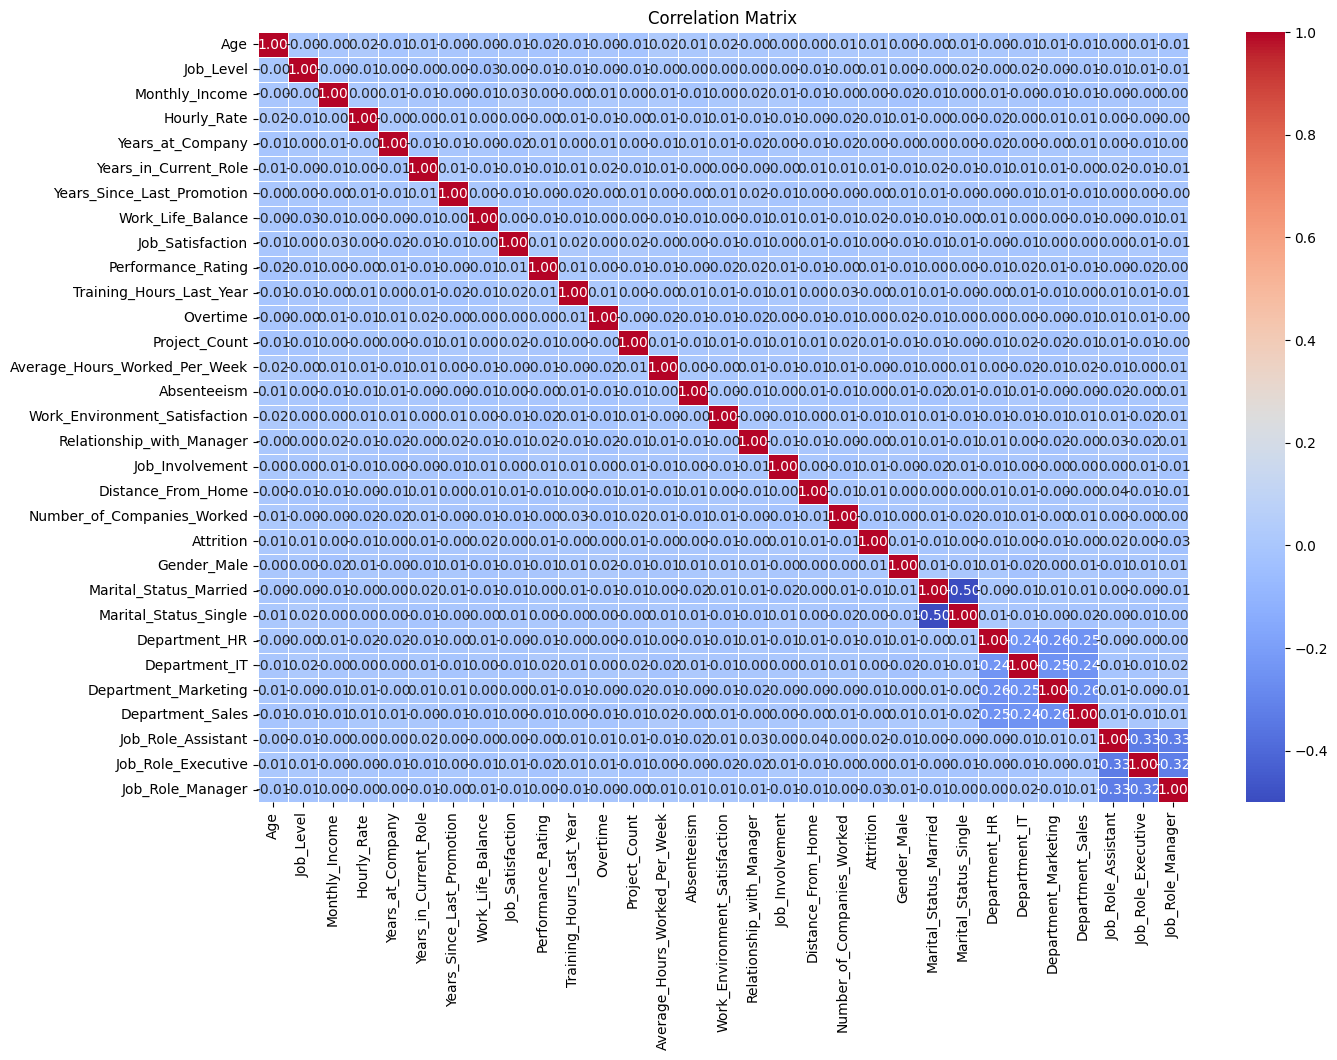

In [20]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Karena datanya kurang bervariasi nilainya dan skalanya agak berbeda maka korelasinya menjadi kurang Informatif

# 3) Klasifikasi Random Forest

In [21]:
encoded_data = data

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Import SMOT

# Define features and target
X = encoded_data.drop(columns=['Attrition'])  # Features
y = encoded_data['Attrition']  # Target

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the shapes of the splits for verification
print(f"Training Features Shape (Before SMOTE): {X_train.shape}")
print(f"Training Features Shape (After SMOTE): {X_train_resampled.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape (Before SMOTE): {y_train.shape}")
print(f"Training Target Shape (After SMOTE): {y_train_resampled.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape (Before SMOTE): (7300, 30)
Training Features Shape (After SMOTE): (11684, 30)
Testing Features Shape: (2700, 30)
Training Target Shape (Before SMOTE): (7300,)
Training Target Shape (After SMOTE): (11684,)
Testing Target Shape: (2700,)


In [24]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the resampled training data and transform the features
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the fitted scaler (no fitting on test data)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled datasets for verification
print(f"Scaled Training Features Shape: {X_train_scaled.shape}")
print(f"Scaled Testing Features Shape: {X_test_scaled.shape}")

Scaled Training Features Shape: (11684, 30)
Scaled Testing Features Shape: (2700, 30)


In [25]:


# Model Initialization
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42, class_weight='balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
}

# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Random Forest', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'KNN', 'SVC', 'Logistic Regression', 'XGBoost', 'AdaBoost', 'Naive Bayes', 'Decision Tree']


🔍 Training and evaluating: Random Forest

📋 Classification Report for Random Forest:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.802185,0.951411,0.870449,2161.000000
1,1,0.233577,0.059369,0.094675,539.000000
2,accuracy,0.773333,0.773333,0.773333,0.773333
3,macro avg,0.517881,0.505390,0.482562,2700.000000
4,weighted avg,0.688674,0.773333,0.715581,2700.000000


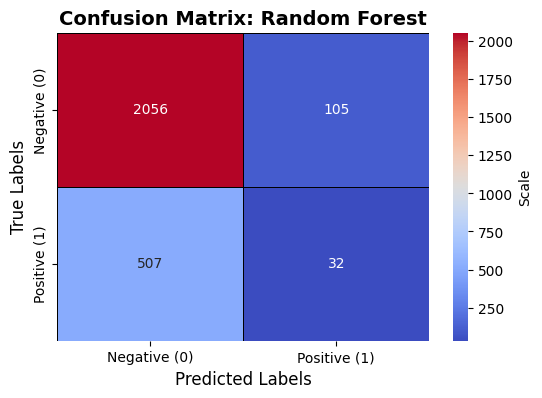

🔍 Training and evaluating: Gradient Boosting

📋 Classification Report for Gradient Boosting:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.801821,0.855622,0.827849,2161.000000
1,1,0.208122,0.152134,0.175777,539.000000
2,accuracy,0.715185,0.715185,0.715185,0.715185
3,macro avg,0.504972,0.503878,0.501813,2700.000000
4,weighted avg,0.683301,0.715185,0.697676,2700.000000


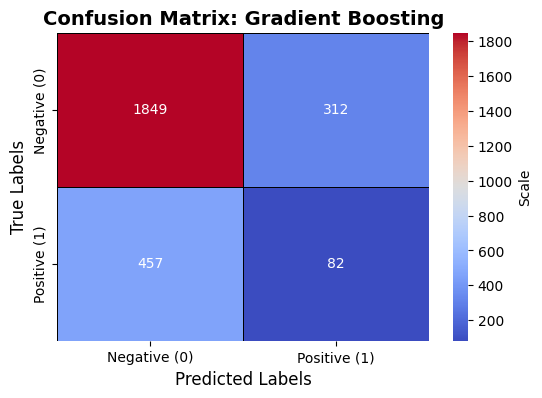

🔍 Training and evaluating: LightGBM

📋 Classification Report for LightGBM:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.802444,0.911615,0.853553,2161.000000
1,1,0.220408,0.100186,0.137755,539.000000
2,accuracy,0.749630,0.749630,0.749630,0.749630
3,macro avg,0.511426,0.505900,0.495654,2700.000000
4,weighted avg,0.686252,0.749630,0.710658,2700.000000


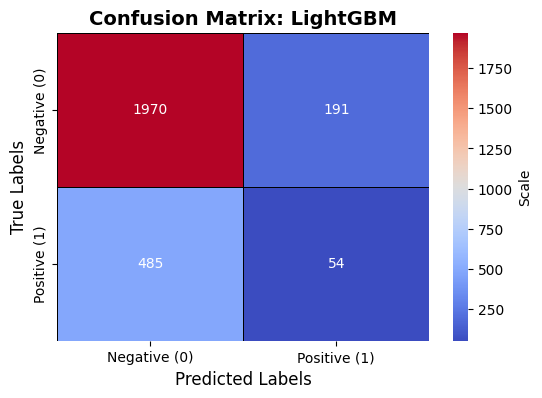

🔍 Training and evaluating: CatBoost

📋 Classification Report for CatBoost:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.804574,0.895419,0.847569,2161.000000
1,1,0.233898,0.128015,0.165468,539.000000
2,accuracy,0.742222,0.742222,0.742222,0.742222
3,macro avg,0.519236,0.511717,0.506518,2700.000000
4,weighted avg,0.690650,0.742222,0.711401,2700.000000


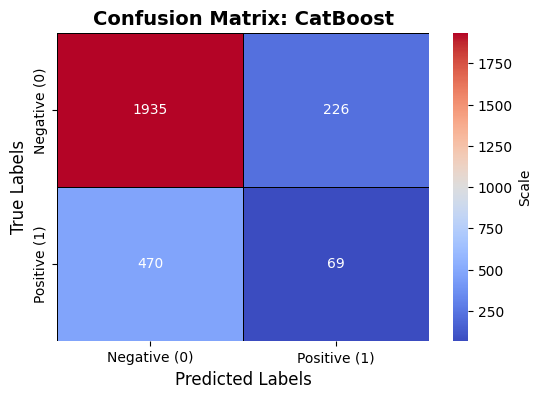

🔍 Training and evaluating: KNN

📋 Classification Report for KNN:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.801462,0.608977,0.692085,2161.000000
1,1,0.201323,0.395176,0.266750,539.000000
2,accuracy,0.566296,0.566296,0.566296,0.566296
3,macro avg,0.501392,0.502077,0.479418,2700.000000
4,weighted avg,0.681656,0.566296,0.607176,2700.000000


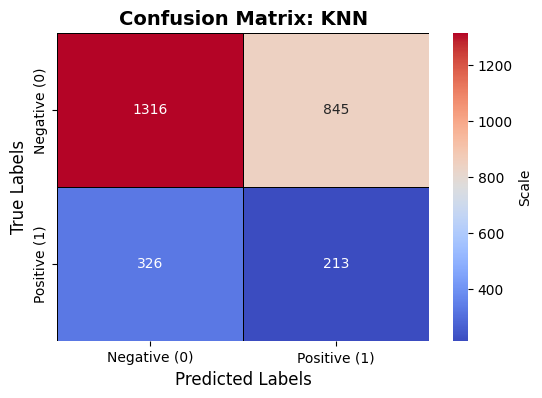

🔍 Training and evaluating: SVC

📋 Classification Report for SVC:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.802414,0.922721,0.858373,2161.000000
1,1,0.223256,0.089054,0.127321,539.000000
2,accuracy,0.756296,0.756296,0.756296,0.756296
3,macro avg,0.512835,0.505887,0.492847,2700.000000
4,weighted avg,0.686797,0.756296,0.712433,2700.000000


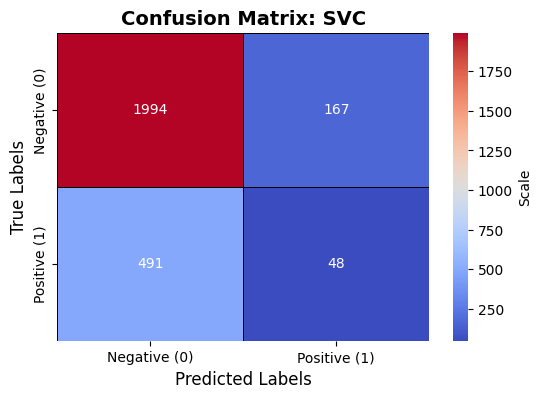

🔍 Training and evaluating: Logistic Regression

📋 Classification Report for Logistic Regression:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.802531,0.821842,0.812071,2161.000000
1,1,0.209446,0.189239,0.198830,539.000000
2,accuracy,0.695556,0.695556,0.695556,0.695556
3,macro avg,0.505988,0.505541,0.505451,2700.000000
4,weighted avg,0.684133,0.695556,0.689650,2700.000000


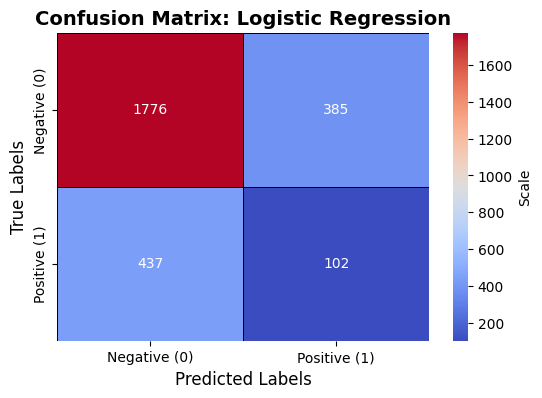

🔍 Training and evaluating: XGBoost

📋 Classification Report for XGBoost:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.798058,0.760759,0.778962,2161.000000
1,1,0.192188,0.228200,0.208651,539.000000
2,accuracy,0.654444,0.654444,0.654444,0.654444
3,macro avg,0.495123,0.494480,0.493807,2700.000000
4,weighted avg,0.677108,0.654444,0.665111,2700.000000


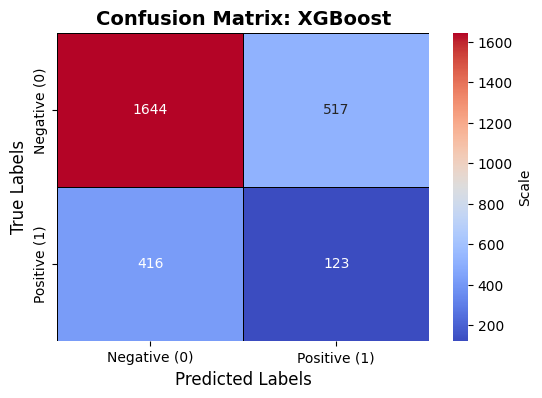

🔍 Training and evaluating: AdaBoost

📋 Classification Report for AdaBoost:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.801785,0.789912,0.795804,2161.000000
1,1,0.204904,0.217069,0.210811,539.000000
2,accuracy,0.675556,0.675556,0.675556,0.675556
3,macro avg,0.503344,0.503490,0.503308,2700.000000
4,weighted avg,0.682630,0.675556,0.679022,2700.000000


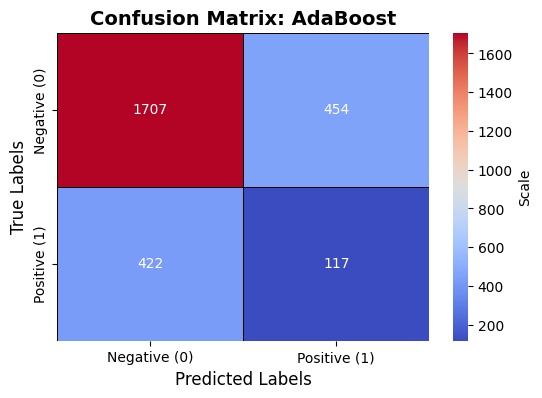

🔍 Training and evaluating: Naive Bayes

📋 Classification Report for Naive Bayes:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.803832,0.893105,0.846120,2161.000000
1,1,0.227425,0.126160,0.162291,539.000000
2,accuracy,0.740000,0.740000,0.740000,0.740000
3,macro avg,0.515628,0.509632,0.504206,2700.000000
4,weighted avg,0.688764,0.740000,0.709608,2700.000000


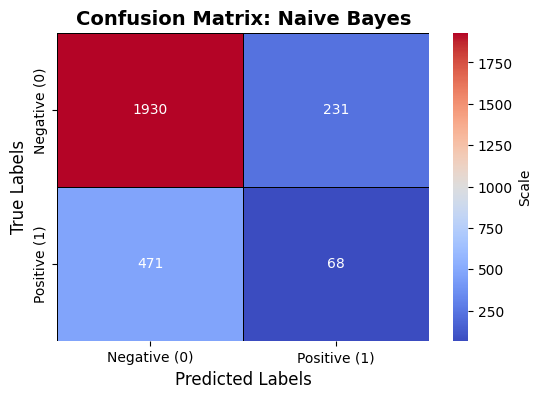

🔍 Training and evaluating: Decision Tree

📋 Classification Report for Decision Tree:



,Metric,Precision,Recall,F1 Score,Support
0,0,0.799260,0.700139,0.746423,2161.000000
1,1,0.197026,0.294991,0.236256,539.000000
2,accuracy,0.619259,0.619259,0.619259,0.619259
3,macro avg,0.498143,0.497565,0.491339,2700.000000
4,weighted avg,0.679037,0.619259,0.644579,2700.000000


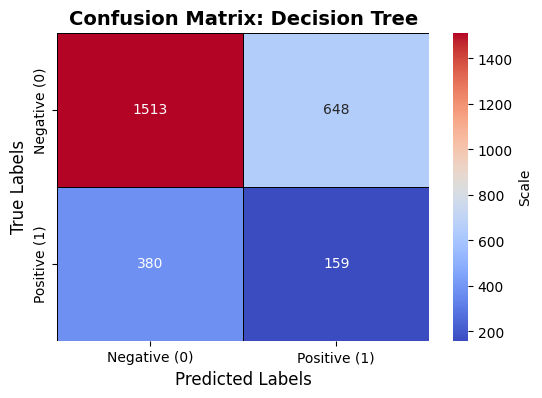

In [26]:
# Import necessary libraries
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize a list to store evaluation results
model_results = []
# Train and evaluate each model
for model_name, model in models.items():
    print(f"🔍 Training and evaluating: {model_name}")

    # Train the model
    model.fit(X_train_scaled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = (
        model.predict_proba(X_test_scaled)[:, 1]
        if hasattr(model, "predict_proba")
        else None
    )

    # Compute accuracy and AUC scores
    accuracy = accuracy_score(y_test, y_pred)
    auc = (
        roc_auc_score(y_test, y_pred_proba)
        if y_pred_proba is not None
        else None
    )

    # Append results to the list
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc if auc else "N/A",
    })

    # Display classification report as a DataFrame
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose().reset_index()
    report_df.rename(
        columns={
            "index": "Metric",
            "precision": "Precision",
            "recall": "Recall",
            "f1-score": "F1 Score",
            "support": "Support",
        },
        inplace=True,
    )
    print(f"\n📋 Classification Report for {model_name}:\n")
    display(report_df.style.set_caption(f"Classification Report: {model_name}"))

    # Generate and display confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="coolwarm",
        xticklabels=["Negative (0)", "Positive (1)"],
        yticklabels=["Negative (0)", "Positive (1)"],
        linewidths=0.5,
        linecolor="black",
        cbar_kws={"label": "Scale"},
    )
    plt.title(f"Confusion Matrix: {model_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


In [27]:
import numpy as np  # For handling missing numeric values

# Summarize model evaluation results in a more styled table
results_df = pd.DataFrame(model_results)

# Replace "N/A" with None to avoid type issues
results_df["AUC"] = results_df["AUC"].replace("N/A", np.nan)

# Create a styled table with conditional formatting
styled_results = (
    results_df.style
    .set_caption("📊 Model Evaluation Summary")
    .set_properties(**{"text-align": "center", "font-size": "12px"})
    .bar(
        subset=["Accuracy"], color="", vmin=0.5, vmax=1.0, align="mid"
    )
    .bar(
        subset=["AUC"], color="", vmin=0.5, vmax=1.0, align="mid"
    )
)

# Display the styled summary table
display(styled_results)


,Model,Accuracy,AUC
0,Random Forest,0.773333,0.506639
1,Gradient Boosting,0.715185,0.496812
2,LightGBM,0.749630,0.502742
3,CatBoost,0.742222,0.504473
4,KNN,0.566296,0.501891
5,SVC,0.756296,0.503778
6,Logistic Regression,0.695556,0.485461
7,XGBoost,0.654444,0.505197
8,AdaBoost,0.675556,0.497184
9,Naive Bayes,0.740000,0.494878


In [28]:
pip install tqdm


Test Size 0.5 Progress: 100%|██████████| 16/16 [00:28<00:00,  1.79s/it]


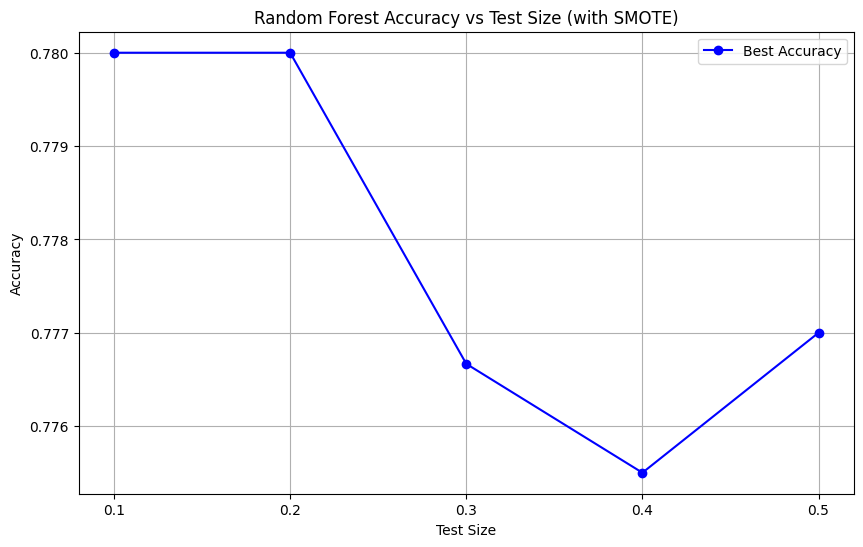

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
from tqdm import tqdm
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Reduced parameter grid for Random Forest
param_grid_rf_reduced = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Test sizes to compare
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []

# Loop over different test sizes
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Explicit loop with tqdm to track progress
    param_grid = list(ParameterGrid(param_grid_rf_reduced))
    best_score = -np.inf

    for params in tqdm(param_grid, desc=f"Test Size {test_size} Progress"):
        # Set model parameters
        model = RandomForestClassifier(**params, random_state=42, class_weight='balanced')

        # Train the model on the resampled data
        model.fit(X_train_resampled, y_train_resampled)
        score = model.score(X_test, y_test)  # Evaluate accuracy on the test set

        # Update the best score
        if score > best_score:
            best_score = score

    # Store the best score for the current test size
    accuracies.append(best_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', color='b', label='Best Accuracy')
plt.title("Random Forest Accuracy vs Test Size (with SMOTE)")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(test_sizes)
plt.legend()
plt.show()

Test Size 0.5 Progress: 100%|██████████| 128/128 [00:47<00:00,  2.67it/s]


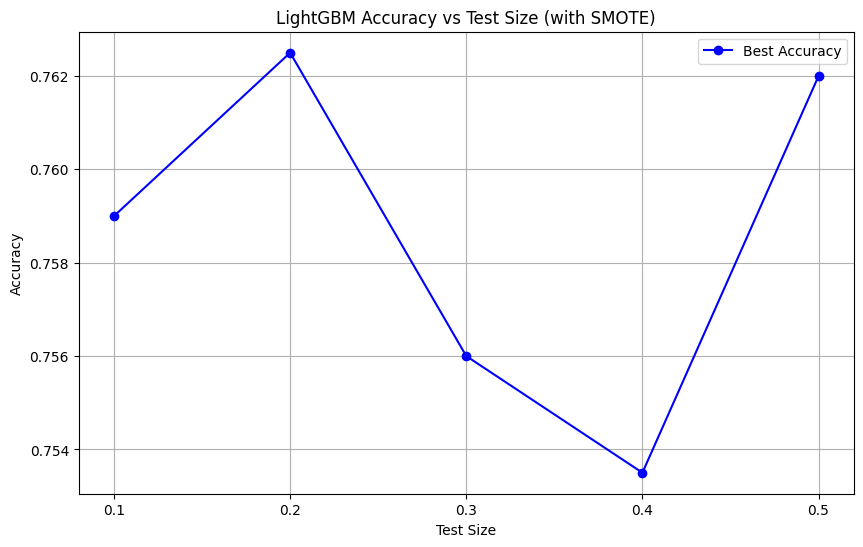

In [32]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier  # Import LightGBM
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
from tqdm import tqdm
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Reduced parameter grid for LightGBM
param_grid_lgbm_reduced = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [10, 20],  # Maximum tree depth
    'learning_rate': [0.01, 0.1],  # Learning rate
    'num_leaves': [31, 63],  # Maximum number of leaves in one tree
    'min_child_samples': [20, 50],  # Minimum number of data in one leaf
    'subsample': [0.8, 1.0],  # Subsample ratio of the training data
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Test sizes to compare
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []

# Loop over different test sizes
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize the LightGBM model
    lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')

    # Explicit loop with tqdm to track progress
    param_grid = list(ParameterGrid(param_grid_lgbm_reduced))
    best_score = -np.inf

    for params in tqdm(param_grid, desc=f"Test Size {test_size} Progress"):
        # Set model parameters
        model = LGBMClassifier(**params, random_state=42, class_weight='balanced')

        # Train the model on the resampled data
        model.fit(X_train_resampled, y_train_resampled)
        score = model.score(X_test, y_test)  # Evaluate accuracy on the test set

        # Update the best score
        if score > best_score:
            best_score = score

    # Store the best score for the current test size
    accuracies.append(best_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', color='b', label='Best Accuracy')
plt.title("LightGBM Accuracy vs Test Size (with SMOTE)")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(test_sizes)
plt.legend()
plt.show()